In [1]:
import requests
import pickle
import spacy
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name: Philip Fowler
https://github.com/drpafowler/web-scraping-philip 

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

1. Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

In [2]:
# URL of the article
url = "https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/"

# Fetch the HTML content
response = requests.get(url)
html_content = response.text

# Dump the HTML content to a .pkl file
with open('article_html.pkl', 'wb') as file:
    pickle.dump(html_content, file)

2. Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

In [3]:
from bs4 import BeautifulSoup

# Load the HTML content from the .pkl file
with open('article_html.pkl', 'rb') as file:
    html_content = pickle.load(file)

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(html_content, 'html.parser')

# Print the text content of the article
print(soup.get_text())


















How Laser Headlights Work | Hackaday






































































Skip to content






Hackaday


Primary Menu

Home
Blog
Hackaday.io
Tindie
Hackaday Prize
Submit
About


Search for:



 March 27, 2021 






How Laser Headlights Work


                130 Comments            

by:
Lewin Day



March 22, 2021








When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!

Laser Headlights?!
BWM’s prototype

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [4]:
# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

# Process the article text
doc = nlp(soup.get_text())

# Filter tokens: remove punctuation, stopwords, and whitespace
tokens = [token.text.lower() for token in doc if not token.is_punct and not token.is_stop and not token.is_space]

# Get the 5 most common tokens
token_freq = Counter(tokens).most_common(5)

# Print the common tokens with their frequencies
print("Most common tokens and their frequencies:")
for token, freq in token_freq:
    print(f"Token: {token}, Frequency: {freq}")

Most common tokens and their frequencies:
Token: comment, Frequency: 136
Token: march, Frequency: 133
Token: 2021, Frequency: 133
Token: says, Frequency: 132
Token: report, Frequency: 130


For curiosity, lets make a chart with the 25 most common.

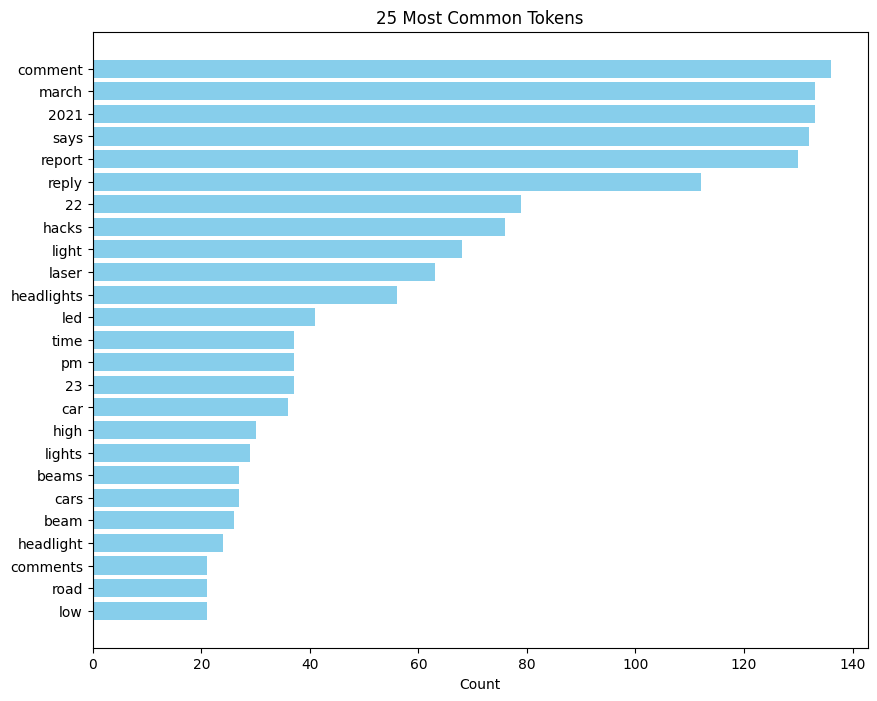

In [5]:
# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

# Process the article text
doc = nlp(soup.get_text())

# Filter tokens: remove punctuation, stopwords, and whitespace
tokens = [token.text.lower() for token in doc if not token.is_punct and not token.is_stop and not token.is_space]

# Get the 20 most common tokens
token_freq = Counter(tokens).most_common(25)

# Separate the tokens and their frequencies
tokens, frequencies = zip(*token_freq)

# Create a horizontal bar chart
plt.figure(figsize=(10, 8))
plt.barh(tokens, frequencies, color='skyblue')
plt.xlabel('Count')
plt.title('25 Most Common Tokens')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest count at the top
plt.show()

4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [6]:
# Filter tokens: remove punctuation, stopwords, and whitespace, and get lemmas
lemmas = [token.lemma_.lower() for token in doc if not token.is_punct and not token.is_stop and not token.is_space]

# Get the 5 most common lemmas
lemma_freq = Counter(lemmas).most_common(5)

# Print the common lemmas with their frequencies
print("Most common lemmas and their frequencies:")
for lemma, freq in lemma_freq:
    print(f"Lemma: {lemma}, Frequency: {freq}")

Most common lemmas and their frequencies:
Lemma: comment, Frequency: 157
Lemma: say, Frequency: 134
Lemma: march, Frequency: 133
Lemma: 2021, Frequency: 133
Lemma: report, Frequency: 130


As before,lets make a chart with the 25 most common.

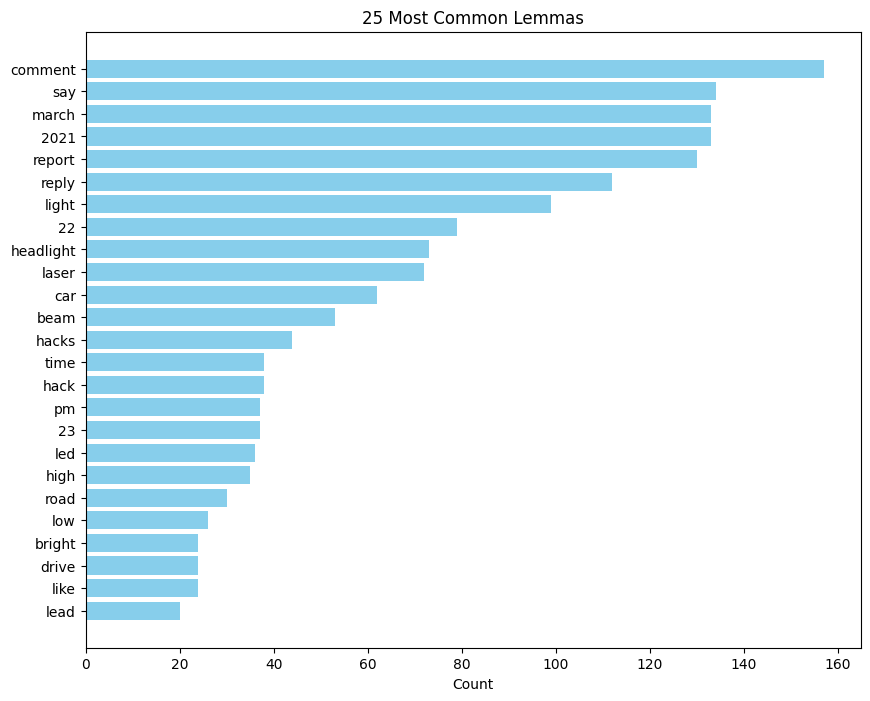

In [7]:
# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

# Process the article text
doc = nlp(soup.get_text())

# Filter tokens: remove punctuation, stopwords, and whitespace, and get lemmas
lemmas = [token.lemma_.lower() for token in doc if not token.is_punct and not token.is_stop and not token.is_space]

# Get the 20 most common lemmas
lemma_freq = Counter(lemmas).most_common(25)

# Separate the lemmas and their frequencies
lemmas, frequencies = zip(*lemma_freq)

# Create a horizontal bar chart
plt.figure(figsize=(10, 8))
plt.barh(lemmas, frequencies, color='skyblue')
plt.xlabel('Count')
plt.title('25 Most Common Lemmas')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest count at the top
plt.show()

So it seems to me that many of the tokens and the lemmas are very similar.  However, looking at the above chart of the 25 most common lemmas, I see a problem.  IT seems to me that if we want to extract meaningful data from this webpage, we likely want to exclude some of the lemmas.  For example, on the webpage there are 130 comments (aka thoughts).  These share a common theme and include the same words repeated.  Such as says, a date, and a time. There is also a reply link and a report link.  Consider the following which is the first comment on the webpage

Ostracus says:
March 22, 2021 at 7:21 am
Headlights with…*pew*pew*pew*. But the main issue I find is how harsh they are on other drivers vision.

Report comment
Reply

Notide that our top 6 lemmas are a part of this comment, and every subsequent comment too.  While we could add this to the exclusion list along with the stop words, I want to experiment first with bi grams and trigrams.

In [8]:
from nltk import ngrams

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Process text
doc = nlp(soup.get_text())

# Get lemmas (excluding punctuation, stopwords, spaces)
lemmas = [token.lemma_.lower() for token in doc 
          if not token.is_punct and not token.is_stop and not token.is_space]

# Create bi-grams and tri-grams
bi_lemmas = list(ngrams(lemmas, 2))
tri_lemmas = list(ngrams(lemmas, 3))

# Get most common bi-grams and tri-grams
bi_freq = Counter(bi_lemmas).most_common(10)
tri_freq = Counter(tri_lemmas).most_common(10)

# Print results
print("Top 10 bi-lemmas:")
for lemma_pair, freq in bi_freq:
    print(f"Bi-gram: {' '.join(lemma_pair)}, Freq: {freq}")

print("\nTop 10 tri-lemmas:")
for lemma_triple, freq in tri_freq:
    print(f"Tri-gram: {' '.join(lemma_triple)}, Freq: {freq}")

Top 10 bi-lemmas:
Bi-gram: say march, Freq: 130
Bi-gram: report comment, Freq: 130
Bi-gram: comment reply, Freq: 110
Bi-gram: march 22, Freq: 79
Bi-gram: 22 2021, Freq: 79
Bi-gram: march 23, Freq: 37
Bi-gram: 23 2021, Freq: 37
Bi-gram: high beam, Freq: 17
Bi-gram: laser headlight, Freq: 15
Bi-gram: low beam, Freq: 15

Top 10 tri-lemmas:
Tri-gram: report comment reply, Freq: 110
Tri-gram: march 22 2021, Freq: 79
Tri-gram: say march 22, Freq: 78
Tri-gram: say march 23, Freq: 37
Tri-gram: march 23 2021, Freq: 37
Tri-gram: dude say march, Freq: 14
Tri-gram: martin say march, Freq: 12
Tri-gram: comment reply martin, Freq: 11
Tri-gram: reply martin say, Freq: 11
Tri-gram: comment reply dude, Freq: 11


This seems to confirm my suspicion as described in the previous markdown cell.  Let's exclude those common words that do not reveal anything useful.

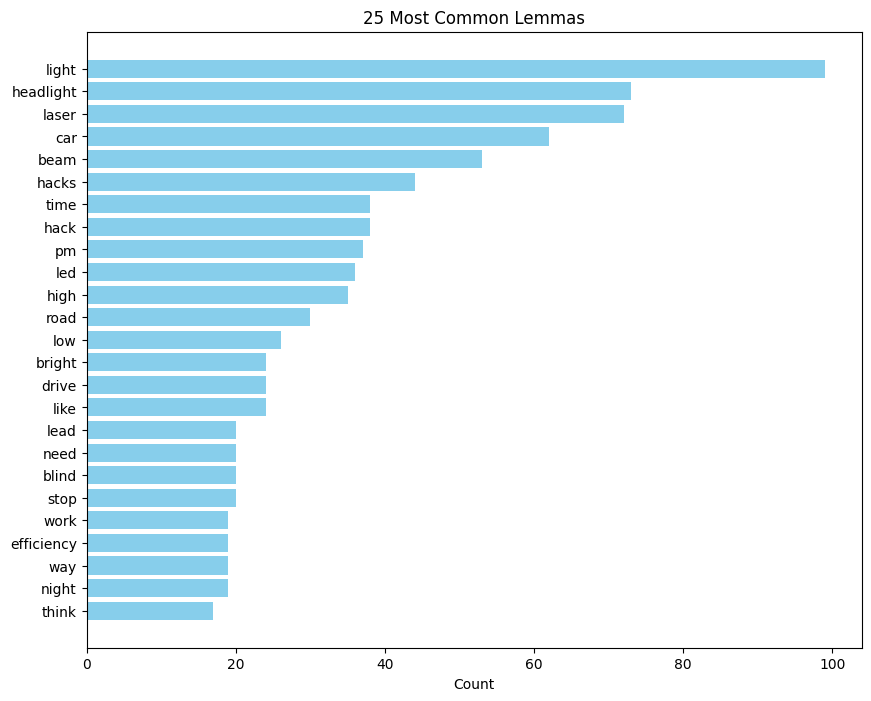

In [9]:
# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

# Process the article text
doc = nlp(soup.get_text())

# Filter tokens: remove punctuation, stopwords, whitespace, and specific terms, and get lemmas
exclude_terms = {'reply', 'report', 'comment', 'say', 'says', 'march', '2021', '22', '23'}
lemmas = [token.lemma_.lower() for token in doc if not token.is_punct and not token.is_stop and not token.is_space and token.lemma_.lower() not in exclude_terms]

# Get the 20 most common lemmas
lemma_freq = Counter(lemmas).most_common(25)

# Separate the lemmas and their frequencies
lemmas, frequencies = zip(*lemma_freq)

# Create a horizontal bar chart
plt.figure(figsize=(10, 8))
plt.barh(lemmas, frequencies, color='skyblue')
plt.xlabel('Count')
plt.title('25 Most Common Lemmas')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest count at the top
plt.show()

That makes a whole lot more sense.  It is not a surprise that an article about laser headlights has the top three lemmas as light, headlight, and laser.  I see pm in the list, which makes me thing that there is information to be gleaned there.  Do most people replying do so in the afternoon or evening?  That'd be an interesting question to explore!

Ok time to move on, I get sidetracked easily.

5. Define the following methods:
    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

In [10]:
def score_sentence_by_token(sentence, interesting_tokens):
    # Tokenize the sentence
    tokens = [token.text.lower() for token in nlp(sentence) if not token.is_punct and not token.is_stop and not token.is_space]
    
    # Count the number of interesting tokens in the sentence
    interesting_count = sum(1 for token in tokens if token in interesting_tokens)
    
    # Calculate the score
    score = interesting_count / len(tokens) if tokens else 0
    return score

def score_sentence_by_lemma(sentence, interesting_lemmas):
    # Tokenize the sentence and get lemmas
    lemmas = [token.lemma_.lower() for token in nlp(sentence) if not token.is_punct and not token.is_stop and not token.is_space]
    
    # Count the number of interesting lemmas in the sentence
    interesting_count = sum(1 for lemma in lemmas if lemma in interesting_lemmas)
    
    # Calculate the score
    score = interesting_count / len(lemmas) if lemmas else 0
    return score

# Test the functions with the first sentence in the article
first_sentence = list(doc.sents)[0].text
interesting_tokens = [token for token, _ in token_freq]
interesting_lemmas = [lemma for lemma, _ in lemma_freq]

token_score = score_sentence_by_token(first_sentence, interesting_tokens)
lemma_score = score_sentence_by_lemma(first_sentence, interesting_lemmas)

print(f"Token score for the first sentence: {token_score}")
print(f"Lemma score for the first sentence: {lemma_score}")

Token score for the first sentence: 0.2926829268292683
Lemma score for the first sentence: 0.14634146341463414


6. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

Min score: 0.0
Max score: 1.0
Number of scores: 458
Median score: 0.14285714285714285
Mode score: 0.0
Mean score: 0.21574527908398444


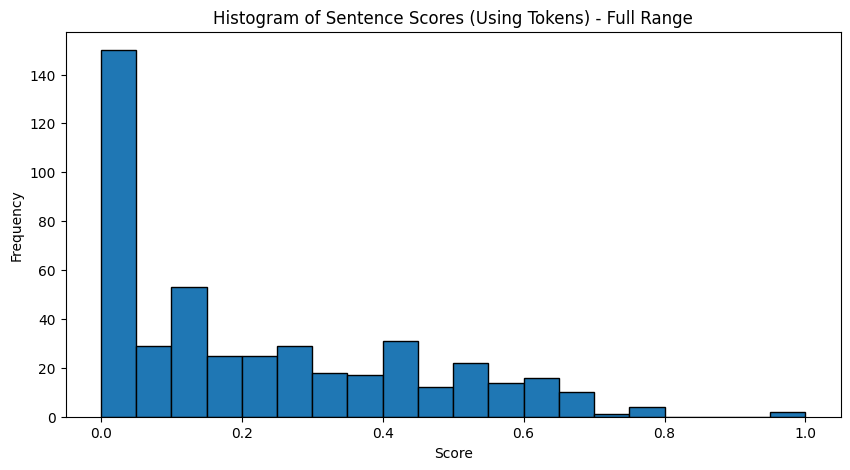

In [11]:
# Calculate the scores for each sentence in the article using tokens
sentence_scores_tokens = [score_sentence_by_token(sentence.text, interesting_tokens) for sentence in doc.sents]

# Print data statistics to understand distribution
print(f"Min score: {min(sentence_scores_tokens)}")
print(f"Max score: {max(sentence_scores_tokens)}")
print(f"Number of scores: {len(sentence_scores_tokens)}")

# Calculate and print median, mode, and mean
median_score = np.median(sentence_scores_tokens)
mode_score = Counter(sentence_scores_tokens).most_common(1)[0][0]
mean_score = np.mean(sentence_scores_tokens)
print(f"Median score: {median_score}")
print(f"Mode score: {mode_score}")
print(f"Mean score: {mean_score}")

# Create histogram without x-axis limits to see full distribution
plt.figure(figsize=(10, 5))
plt.hist(sentence_scores_tokens, bins=20, edgecolor='black')
plt.title('Histogram of Sentence Scores (Using Tokens) - Full Range')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

7. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

Min score: 0.0
Max score: 1.0
Number of scores: 458
Median score: 0.125
Mode score: 0.0
Mean score: 0.1564048443962593


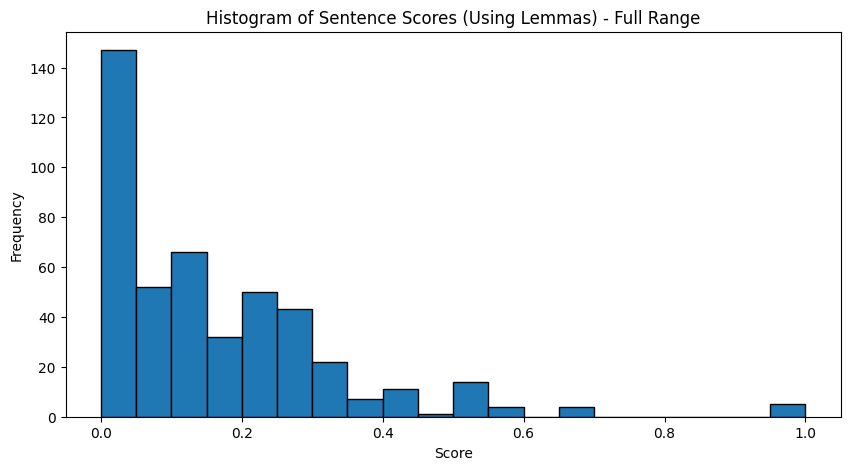

In [12]:
# Calculate the scores for each sentence in the article using lemmas
sentence_scores_lemmas = [score_sentence_by_lemma(sentence.text, interesting_lemmas) for sentence in doc.sents]

# Print data statistics to understand distribution
print(f"Min score: {min(sentence_scores_lemmas)}")
print(f"Max score: {max(sentence_scores_lemmas)}")
print(f"Number of scores: {len(sentence_scores_lemmas)}")

# Calculate and print median, mode, and mean
median_score = np.median(sentence_scores_lemmas)
mode_score = Counter(sentence_scores_lemmas).most_common(1)[0][0]
mean_score = np.mean(sentence_scores_lemmas)
print(f"Median score: {median_score}")
print(f"Mode score: {mode_score}")
print(f"Mean score: {mean_score}")

# Create histogram without x-axis limits to see full distribution
plt.figure(figsize=(10, 5))
plt.hist(sentence_scores_lemmas, bins=20, edgecolor='black')
plt.title('Histogram of Sentence Scores (Using Lemmas) - Full Range')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

8. Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it). 

I did some experimenting earlier with other terms to be ommitted.  However, spacy can identify parts of speech.  Per spacy documentation https://spacy.io/usage/linguistic-features, spacy can identify parts of speech.  I am going to add exclude words so we don't get things like report and comment in the list.

In [13]:
# Filter tokens: remove punctuation, stopwords, whitespace, and specific terms, and only keep nouns
exclude_terms = {'reply', 'report', 'comment', 'say', 'says', 'march', '2021', '22', '23'}
tokens = [token.text.lower() for token in doc if token.pos_ == 'NOUN' and not token.is_punct and not token.is_stop and not token.is_space and token.text.lower() not in exclude_terms]

# Get the 5 most common tokens
token_freq = Counter(tokens).most_common(5)

# Print the common tokens with their frequencies
print("Most common noun tokens and their frequencies:")
for token, freq in token_freq:
    print(f"Token: {token}, Frequency: {freq}")

# Filter tokens: remove punctuation, stopwords, whitespace, and specific terms, and get lemmas
exclude_terms = {'reply', 'report', 'comment', 'say', 'says', 'march', '2021', '22', '23'}
lemmas = [token.lemma_.lower() for token in doc if not token.is_punct and not token.is_stop and not token.is_space and token.lemma_.lower() not in exclude_terms]

# Get the 5 most common lemmas
lemma_freq = Counter(lemmas).most_common(5)

# Print the common lemmas with their frequencies
print("Most common noun lemmas and their frequencies:")
for lemma, freq in lemma_freq:
    print(f"Lemma: {lemma}, Frequency: {freq}")

Most common noun tokens and their frequencies:
Token: laser, Frequency: 51
Token: headlights, Frequency: 49
Token: light, Frequency: 42
Token: pm, Frequency: 37
Token: car, Frequency: 36
Most common noun lemmas and their frequencies:
Lemma: light, Frequency: 99
Lemma: headlight, Frequency: 73
Lemma: laser, Frequency: 72
Lemma: car, Frequency: 62
Lemma: beam, Frequency: 53


# Time to experiment

I am curious about the comments  Are they positive about this topic?  Negative?  

Min sentiment: -0.9759
Max sentiment: 0.9765
Mean sentiment: 0.08113615384615384
Median sentiment: 0.0
Mode sentiment: 0.0
Number of sentiment scores less than zero: 50
Number of sentiment scores equal to zero: 17
Number of sentiment scores greater than zero: 63
Percentage of sentiment scores less than zero: 38.46%
Percentage of sentiment scores equal to zero: 13.08%
Percentage of sentiment scores greater than zero: 48.46%


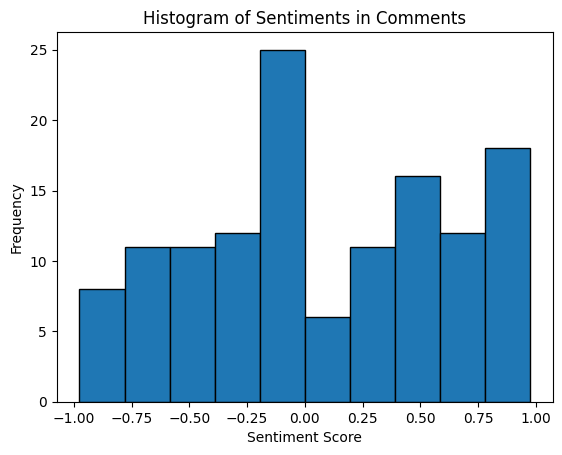

In [14]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize the sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Extract the main text of each thought
def extract_thoughts(soup):
    # Extract all the comments from the article
    comments = soup.find_all('div', class_='comment-content')
    
    # Extract the main text of each thought
    thoughts = [comment.get_text(strip=True) for comment in comments]
    
    return thoughts

thoughts = extract_thoughts(soup)

# Create a list of sentiments
sentiments = [analyzer.polarity_scores(thought)['compound'] for thought in thoughts]

# Print a list of statistics about the sentiments
print(f"Min sentiment: {min(sentiments)}")  # Minimum sentiment score
print(f"Max sentiment: {max(sentiments)}")  # Maximum sentiment score
print(f"Mean sentiment: {np.mean(sentiments)}")  # Mean sentiment score
print(f"Median sentiment: {np.median(sentiments)}")  # Median sentiment score
print(f"Mode sentiment: {max(sentiments, key=sentiments.count)}")  # Mode sentiment score

# Print the count of sentiment scores less than zero
negative_sentiments_count = sum(1 for sentiment in sentiments if sentiment < 0)
print(f"Number of sentiment scores less than zero: {negative_sentiments_count}")
print(f"Number of sentiment scores equal to zero: {sentiments.count(0)}")
print(f"Number of sentiment scores greater than zero: {len(sentiments) - negative_sentiments_count - sentiments.count(0)}")
print(f"Percentage of sentiment scores less than zero: {negative_sentiments_count / len(sentiments) * 100:.2f}%")
print(f"Percentage of sentiment scores equal to zero: {sentiments.count(0) / len(sentiments) * 100:.2f}%")
print(f"Percentage of sentiment scores greater than zero: {(len(sentiments) - negative_sentiments_count - sentiments.count(0)) / len(sentiments) * 100:.2f}%")

# Plot a single histogram of the sentiments
plt.hist(sentiments, bins=10, edgecolor='black')
plt.title('Histogram of Sentiments in Comments')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

In [15]:
from spacy.lang.en.stop_words import STOP_WORDS

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

# Print the list of stopwords
print(STOP_WORDS)

{'than', 'someone', 'latter', 'across', 'beyond', 'get', 'seemed', 'they', 'myself', 'again', 'twenty', 'since', "'s", 'become', 'thus', 'four', 'wherein', 'within', 'same', 'who', 'several', '‘ve', 'afterwards', 'yourself', 'keep', 'mostly', 'hereby', 'our', 'onto', 'twelve', '‘ll', 'too', '‘s', 'we', 'rather', 'will', 'part', 'thereupon', 'whenever', 'call', 'else', 'when', 'using', 'between', 'have', 'that', 'latterly', 'those', 'therein', 'may', 'throughout', "'ve", 'beside', 'various', '‘re', 'can', 'on', 'either', 'regarding', 'above', 'really', 'all', 'many', 'cannot', 'give', 'thence', 'does', 'everything', 'moreover', 'done', 'nothing', '’s', 'has', 'somewhere', 'do', 'around', 'without', 'amount', 'whose', 'once', 'might', 'you', 'while', 'well', 'beforehand', 'so', 'whereas', 'fifteen', 'anyone', 'formerly', 'seem', 'whatever', 'their', 'last', 'most', 'perhaps', 'been', 'front', 'least', 'among', 'by', 'after', 'now', 'before', 'made', 'could', 'only', 'indeed', 'but', 'bot

I wanted to make a wordcloud too.  Just because I thought it would be a cool way to visualize the top tokens

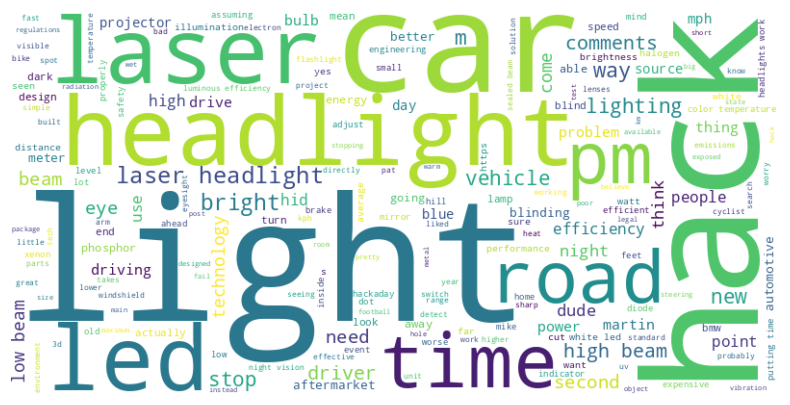

In [16]:
from wordcloud import WordCloud

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

# Process the article text
doc = nlp(soup.get_text())

# Filter tokens: remove punctuation, stopwords, and whitespace
exclude_terms = {'reply', 'report', 'comment', 'say', 'says', 'march', '2021', '22', '23'}
tokens = [token.text.lower() for token in doc if not token.is_punct and not token.is_stop and not token.is_space and token.text.lower() not in exclude_terms]

# Join tokens to form a single string
text = ' '.join(tokens)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

That is a cool wordcloud.  Let's look at other ways to examine the data. 

Let's take a look at the comments.  How long are the comments? Let's make a data table of sentiment score and word count for the comments.

In [25]:
import pandas as pd

# Initialize VADER
analyzer = SentimentIntensityAnalyzer()

# Extract comments and create DataFrame
def create_comment_df(soup):
    # Extract comments
    comments = soup.find_all('div', class_='comment-content')
    
    # Create lists for DataFrame
    data = []
    for comment in comments:
        text = comment.get_text(strip=True)
        sentiment = analyzer.polarity_scores(text)['compound']
        word_count = len(text.split())
        
        data.append({
            'comment': text,
            'sentiment': sentiment,
            'word_count': word_count
        })
    
    # Create DataFrame
    df = pd.DataFrame(data)
    return df

# Create DataFrame
comment_df = create_comment_df(soup)

# Display first few rows
print(comment_df.head())


                                             comment  sentiment  word_count
0  Headlights with…*pew*pew*pew*. But the main is...    -0.3291          17
1  As someone in my 50s, with naturally deteriora...     0.3465         117
2  To be complete, these laser headlamps comes wi...     0.5859          49
3  I’m… just trying to parse this. You really thi...    -0.7479          98
4  A full stop from 70 KPH takes FIFTEEN SECONDS?...    -0.2960          16


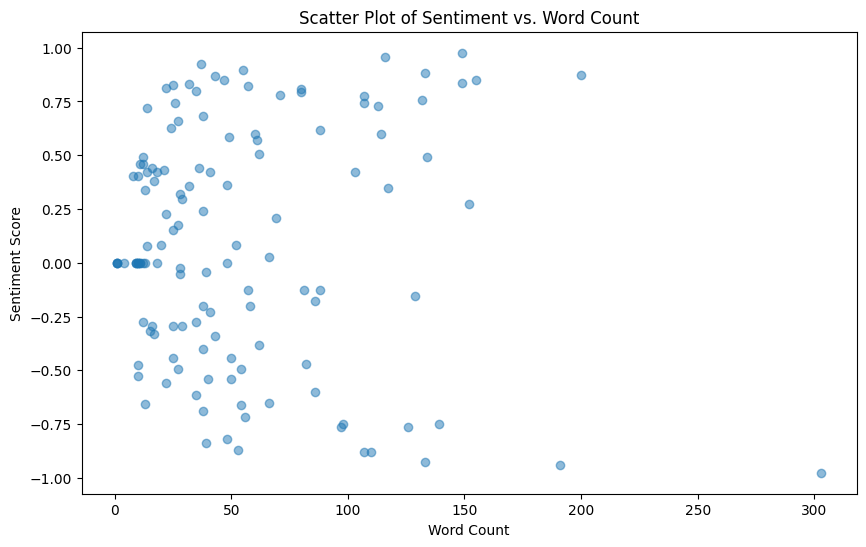

In [26]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame `comment_df` with 'sentiment' and 'word_count' columns
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(comment_df['word_count'], comment_df['sentiment'], alpha=0.5)
plt.title('Scatter Plot of Sentiment vs. Word Count')
plt.xlabel('Word Count')
plt.ylabel('Sentiment Score')
plt.show()

Maybe it is just an optical illusion; but my eyballs see a parabola opening to the right.

Lets try looking at the positive and negative sentiments separately.

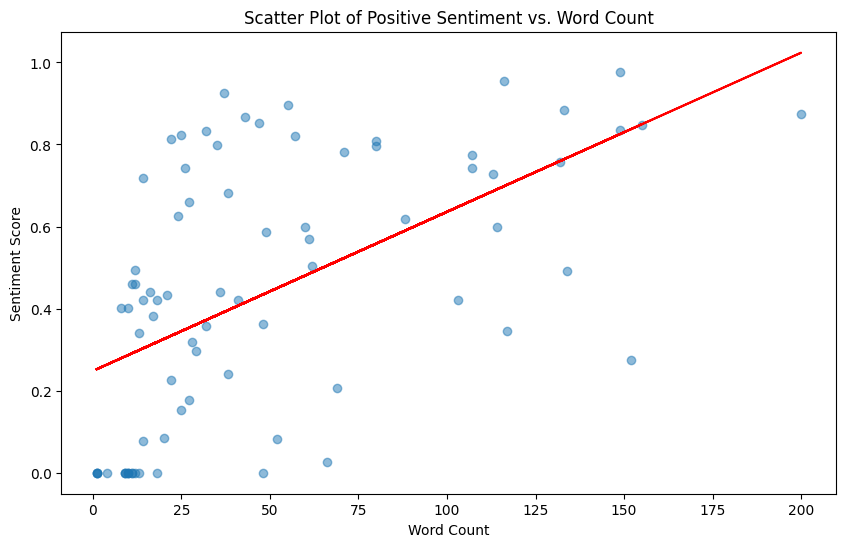

In [30]:
# Filter the DataFrame to only include rows with positive sentiments
positive_comments_df = comment_df[comment_df['sentiment'] >= 0]

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(positive_comments_df['word_count'], positive_comments_df['sentiment'], alpha=0.5)

# Calculate the best fit line
m, b = np.polyfit(positive_comments_df['word_count'], positive_comments_df['sentiment'], 1)
plt.plot(positive_comments_df['word_count'], m * positive_comments_df['word_count'] + b, color='red')

# Add titles and labels
plt.title('Scatter Plot of Positive Sentiment vs. Word Count')
plt.xlabel('Word Count')
plt.ylabel('Sentiment Score')
plt.show()

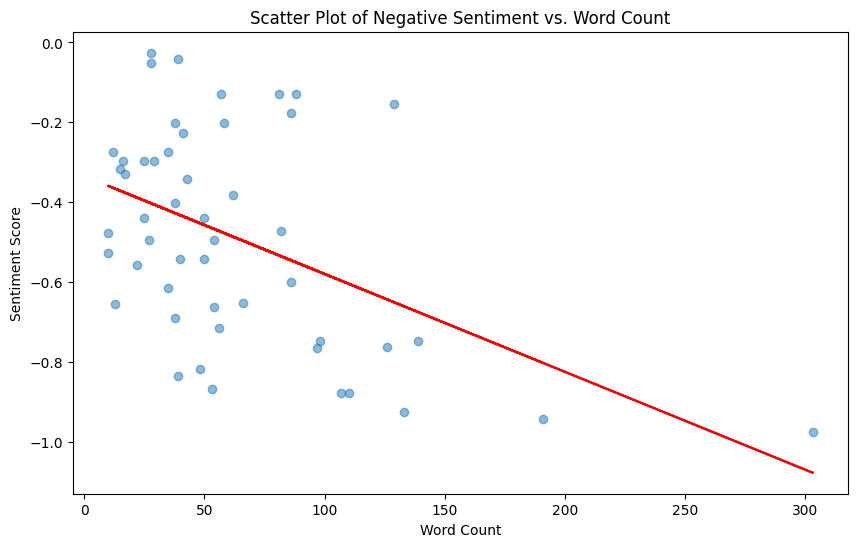

In [31]:
# Filter the DataFrame to only include rows with negative sentiments
negative_comments_df = comment_df[comment_df['sentiment'] < 0]

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(negative_comments_df['word_count'], negative_comments_df['sentiment'], alpha=0.5)

# Calculate the best fit line
m, b = np.polyfit(negative_comments_df['word_count'], negative_comments_df['sentiment'], 1)
plt.plot(negative_comments_df['word_count'], m * negative_comments_df['word_count'] + b, color='red')

# Add titles and labels
plt.title('Scatter Plot of Negative Sentiment vs. Word Count')
plt.xlabel('Word Count')
plt.ylabel('Sentiment Score')
plt.show()

In [ ]:
from scipy.stats import pearsonr

# Initialize VADER
analyzer = SentimentIntensityAnalyzer()

# Extract comments and create DataFrame
def create_comment_df(soup):
    # Extract comments
    comments = soup.find_all('div', class_='comment-content')
    
    # Create lists for DataFrame
    data = []
    for comment in comments:
        text = comment.get_text(strip=True)
        sentiment = analyzer.polarity_scores(text)['compound']
        word_count = len(text.split())
        
        data.append({
            'sentiment': sentiment,
            'word_count': word_count
        })
    
    # Create DataFrame
    df = pd.DataFrame(data)
    return df

# Create DataFrame
comment_df = create_comment_df(soup)

# Separate positive and negative sentiment comments
#including 0 as positive sentiment and negative sentiment
positive_comments = comment_df[comment_df['sentiment'] >= 0]
negative_comments = comment_df[comment_df['sentiment'] <= 0]

# Calculate correlation for positive sentiment
pos_corr, _ = pearsonr(positive_comments['word_count'], positive_comments['sentiment'])
print(f"Correlation between word count and positive sentiment: {pos_corr}")

# Calculate correlation for negative sentiment
neg_corr, _ = pearsonr(negative_comments['word_count'], negative_comments['sentiment'])
print(f"Correlation between word count and negative sentiment: {neg_corr}")

Correlation between word count and positive sentiment: 0.556380631691537
Correlation between word count and negative sentiment: -0.6159169590007461


My interpretation of this is that there is a correlation.  It seems to be that the comments with the strongest positive or negative sentiment have a larger word count.  

This leads me to a new question though.  Is the sentiment score stronger because spacy has more data to work with?  Or are the most zealous commenters really more verbose?  I really don;t know how to answer that question.